<a href="https://colab.research.google.com/github/DrishttiNarwal/Project_1/blob/main/Drishtti_Narwal_Project1_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Project 1:
#Build an ANN and a CNN Model on Fashion MNIST dataset using Keras Sequential API
#Dataset:
#https://keras.io/api/datasets/fashion_mnist/

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

In [ ]:
mnist = keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


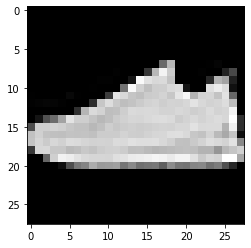

7

In [ ]:
import matplotlib.pyplot as plt
i = 275
plt.imshow(x_train[i],cmap = 'gray')
plt.show()
y_train[i]

In [ ]:
num_classes = 10
input_shape = (28,28,1)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train = x_train.astype("float32")/255
x_test = x_train.astype("float32")/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
np.expand_dims(x_train,-1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
print("x_train shape:",x_train.shape)
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

x_train shape: (60000, 28, 28)
60000 train samples
60000 test samples


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation = 'softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
history = model.fit(x_train,y_train,epochs = 15)

Epoch 1/15
 442/1875 [======>.......................] - ETA: 1:07 - loss: 0.2954 - accuracy: 0.8901

In [ ]:
batch_size=128
epochs=15
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 50s 116ms/step - loss: 0.2689 - accuracy: 0.9033 - val_loss: 0.2425 - val_accuracy: 0.9115
Epoch 2/15
422/422 [==============================] - 41s 98ms/step - loss: 0.2574 - accuracy: 0.9062 - val_loss: 0.2410 - val_accuracy: 0.9113
Epoch 3/15
422/422 [==============================] - 42s 99ms/step - loss: 0.2565 - accuracy: 0.9067 - val_loss: 0.2389 - val_accuracy: 0.9110
Epoch 4/15
422/422 [==============================] - 42s 100ms/step - loss: 0.2503 - accuracy: 0.9098 - val_loss: 0.2391 - val_accuracy: 0.9130
Epoch 5/15
422/422 [==============================] - 41s 98ms/step - loss: 0.2524 - accuracy: 0.9074 - val_loss: 0.2362 - val_accuracy: 0.9123
Epoch 6/15
422/422 [==============================] - 43s 101ms/step - loss: 0.2463 - accuracy: 0.9095 - val_loss: 0.2363 - val_accuracy: 0.9125
Epoch 7/15
422/422 [==============================] - 41s 98ms/step - loss: 0.2454 - accuracy: 0.9112 - val_loss: 0.2419 - val_accura

In [ ]:
!pip install streamlit==0.83.0 --quiet
!pip install streamlit-drawable-canvas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from streamlit_drawable_canvas import st_canvas
from tensorflow import keras
import cv2

model=keras.models.load_model('model_digit_cnn.hdfs',compile=False)

st.title("FASHION ITEM CLASSIFIER USING CNN")
st.subheader("Draw the fashion item in the below given space and click on PREDICT")

col1,col2=st.beta_columns(2)

with col1:
  st.write("Original Image")
  canvas_result=st_canvas(fill_color='#000000',stroke_width=20,stroke_color='#32cf1d',
  background_color='#000000',width=225,height=225,drawing_mode='freedraw')

with col2:
  if canvas_result.image_data is not None:
    img=cv2.resize(canvas_result.image_data.astype('uint8'),(28,28))
    rescaled=cv2.resize(img,(225,225))
    st.write("Rescaled Image")
    st.image(rescaled)


if st.button("PREDICT"):
  test_x=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  test_x=np.expand_dims(test_x,axis=0)
  val=model.predict(test_x)
  st.title(f'Result:{np.argmax(val[0])}')
  st.bar_chart(val[0])

Overwriting app.py


In [ ]:
#The classes are:

#Label	Description
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2023-01-31 13:14:27.187 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.764s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.84.18:8501

your url is: https://fancy-tires-search-34-125-84-18.loca.lt
2023-01-31 13:14:31.731892: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
1/1 [==============================] - 0s 66ms/step
  Stopping...
^C
